# Pandas and Mathplot [version 0.73] 200414 1600

### Datamining and Statistics 1920, College 2, [2 EC, 56 SBU , Product]
### Micha van der Meer - Haarlem, the Netherlands

## Pandas  
pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,  
built on top of the Python programming language.  
Founded in 2008 by AQR Capital Management and become open source in 2009. 

## RECAP : What happend in last episode? when we introduced a mistery chicken?

In [1]:
# How we did it in the stoneage with Python 
with open(
          'data/chickweight.csv'                                     # csv to read 
           , 'r'                                                     # r= read, a= append, w= write, x=create 
          ) as ff:
    
    for _ in range(5):                                               # range is first 5 lines (incl header)
          print(ff.readline())                                       # you can return one line by using the readline() method
    ff.close()                                                       # if you dont close file garbage colletion is not working

rownum,weight,Time,Chick,Diet

1,42,0,1,1

2,51,2,1,1

3,59,4,1,1

4,64,6,1,1



### Welcome to the world with Pandas

In [2]:
import pandas as pd                                                 # import Pandas
import numpy as np                                                  # import NumPy (we need it within a hour)

In [3]:
chickweight = (
        pd.read_csv('data/chickweight.csv')                         # read_csv file also read_sql, read_json, read_excel etc.. 
        .rename(str.lower, axis='columns')                          # rename the axes of the index or columns in dataframe
        )

In [4]:
type (chickweight)                                                  # read_XXX You can use them to save the data and labels 
                                                                    # from Pandas objects to a file and load them later as  
                                                                    # Pandas Series or DataFrame instances.

pandas.core.frame.DataFrame

In [5]:
chickweight                                                         # At last! Everything is now lowercase (Autism?)

,rownum,weight,time,chick,diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1
...,...,...,...,...,...
573,574,175,14,50,4
574,575,205,16,50,4
575,576,234,18,50,4
576,577,264,20,50,4


## What I sometimes see in code assessments [No joke]

#### Crazy Chicken Metaphor
<img src="img/moorhuhn.png" width="240" height="240" align="right"/>

Some people ask me what I have or against Chickens? Just google on Moorhuhn and me and you know.

Suppose that you want to roast a chicken and you explain me what you do. 

You would probably describe the process in a way like below:

```
Take the chicken (kill it, otheriwise it is not nice) -> 
   Then season it, with hot spices ->
   Then season it, with olive oil -> 
   Then put it in the oven / grill at 180 celsius -> 
   Then serve it, on a plate
```

But a normal person would never describe to process on the following way:

```
Serve -> the thing that(
    PutInOven( -> the thing that 
        Season( -> the thing that
            Season( -> the thing that 
                Chicken, with hot spices),
        with olive oil),
    at xxx celsius), 
on a plate)
```

It sounds crazy, but many students write code like this..  and that is usually not my problem.    
It become a problem, when they show this code on their code-assessment!    
Seriously, it's not a crazy chicken but crazy code!.

## Grammar 

Notice that when we describe our cooking code that each command has different parts:

```
Take the chicken  -> 
   Then season it, with hot spices ->
   Then season it, with olive oil -> 
   Then put it in the oven / grill at 180 celsius -> 
   Then serve it, on a plate
```
We can abstract this into:

```
Take the chicken
   Then (season)::verb/what, (with hot spices)::argument/how
   Then (season)::verb/what, (with olive oil)::argument/how
   Then (heat)::verb/what, (at 180 celsius)::argument/how
   Then (serve)::verb/what, (on a plate)::argument/how
```
Notice that every step has a *verb* that explains **what** we are doing    
and we have an *argument* with that verb that explains **how** we are doing it.  
   
The combination of these two is what we like to call a `grammar`.   
The nice thing about being able to use a grammar this way is that it is relatively easy to   
build a pipeline of steps that together form your analysis.


    

In [6]:
chickweight.head(10)                                     #First 10 rows

,rownum,weight,time,chick,diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1
5,6,93,10,1,1
6,7,106,12,1,1
7,8,125,14,1,1
8,9,149,16,1,1
9,10,171,18,1,1


# What analytics could we do? 

1. We might discover which diet is best for our chickens.     
2. We might estimate how big the chickens get, if it lives longer.   
3. We might learn, if chickens grow quicker during specific weeks.  

## Verbs on a Dataframe 

Let's demonstrate some "verbs" on a dataframe.    
If a dataframe is a noun then verbs are actions that can be performed.   
Typically a dataframe needs to be able to: 

1. select the columns 
2. select the rows 
3. rename the columns 
4. sort the rows 
5. summarise statistics 
6. create new columns 

Whatever analysis that you are doing, about 80% of them can be described with these "verbs".   
We will demonstrate these commands on the chickweight dataframe such that we can later use it to do analysis.

## Verbs for Filtering

In [7]:
chickweight.tail(4)                                       # What do you think, what is the outcome?

,rownum,weight,time,chick,diet
574,575,205,16,50,4
575,576,234,18,50,4
576,577,264,20,50,4
577,578,264,21,50,4


In [8]:
(
    chickweight                                           # What do you think, what is the outcome? (chain 2 -> head & tail)
    .head(5)                                              # Make a chain, Python need braces around the whole function.
    .tail(2)
)

,rownum,weight,time,chick,diet
3,4,64,6,1,1
4,5,76,8,1,1


In [9]:
(
    chickweight                                           # What do you think, what is the outcome? (chain 2 -> loc & head) 
    .loc[lambda df: df['time'] < 3]                       # [] in this is case is called a seletor. 
    .head(4)
)

,rownum,weight,time,chick,diet
0,1,42,0,1,1
1,2,51,2,1,1
12,13,40,0,2,1
13,14,49,2,2,1


In [10]:
(
    chickweight                                           # What do you think, what is the outcome? (chain 3 -> loc, loc, head) 
    .loc[lambda df: df['time'] < 5]                       # Loc always need square brackets [] 
    .loc[lambda df: df['chick'] == 1]
    .head(4)
)

,rownum,weight,time,chick,diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1


### Conclusion

You'll notice that whenever `<dataframe>.<verb>` is used, that the output of this operation is a dataframe <object>.    
This means that we can "chain" commands together to form the `-then->` style of programming. 

Note that we are using a `lambda` function here to describe how we are using the `.loc` command.   
The `.loc` tells us **what** we are doing (filtering) and the function tells us **how**.

# Verbs for Selection

You can use square brackets to select columns. We've used it before within `.loc` but you can also use it outside of it.

In [11]:
chickweight[['weight', 'time']]

,weight,time
0,42,0
1,51,2
2,59,4
3,64,6
4,76,8
...,...,...
573,175,14
574,205,16
575,234,18
576,264,20



If you prefer using `.loc` to select columns, you can use the following syntax. You will keep things consistent

In [12]:
(
    chickweight
    .loc[:, ['weight', 'time']]                       # Select col weight & time
    .loc[lambda df: df['weight'] > 350]               # Select all heavy Chicks 
)

,weight,time
398,361,20
399,373,21


In [13]:
(
    chickweight
    .drop(columns=['chick'])                          # Drop all info you do not need.
    .loc[lambda df: df['weight'] < 40]                # Select all skinny Chicks
)

,rownum,weight,time,diet
25,26,39,2,1
194,195,39,0,1
195,196,35,2,1
292,293,39,0,2
304,305,39,0,2
316,317,39,0,2
364,365,39,0,3
400,401,39,0,3
542,543,39,0,4


# Verbs for Sorting

In [14]:
(
    chickweight
    .sort_values('weight')                # Sorting data is awesome, but keep in mind that 
)                                         # the order in which you run the commands matter!

,rownum,weight,time,chick,diet
195,196,35,2,18,1
364,365,39,0,33,3
304,305,39,0,28,2
316,317,39,0,29,2
25,26,39,2,3,1
...,...,...,...,...,...
231,232,331,21,21,2
397,398,332,18,35,3
387,388,341,21,34,3
398,399,361,20,35,3


In [15]:
(
    chickweight                             # Deliver me, the heavy Chicks! Part 1,  something goes wrong?
    .head(10)
    .sort_values('weight', ascending=False)
)

,rownum,weight,time,chick,diet
9,10,171,18,1,1
8,9,149,16,1,1
7,8,125,14,1,1
6,7,106,12,1,1
5,6,93,10,1,1
4,5,76,8,1,1
3,4,64,6,1,1
2,3,59,4,1,1
1,2,51,2,1,1
0,1,42,0,1,1


In [16]:
(
    chickweight                             # Deliver me, the heavy Chicks! Part 2, Size ,.. order does mather!
    .sort_values('weight', ascending=False)
    .head(10)    
)

,rownum,weight,time,chick,diet
399,400,373,21,35,3
398,399,361,20,35,3
387,388,341,21,34,3
397,398,332,18,35,3
231,232,331,21,21,2
386,387,327,20,34,3
553,554,322,21,48,4
459,460,321,21,40,3
230,231,318,20,21,2
327,328,309,21,29,2


# Verbs for Aggregation

Aggregation is the act of splitting up your original dataset to calculate statistics on sub-dataframes.

<img src="img/data_aggregation.png" width="500" height="500" align="center"/>    

There are a couple of ways to do this in pandas but we need to pay close attention to the data types. 

In [17]:
chickweight.describe()                             # Some persons, which I do not name become very happy with statics!

,rownum,weight,time,chick,diet
count,578.000000,578.000000,578.000000,578.000000,578.000000
mean,289.500000,121.818339,10.717993,25.750865,2.235294
std,166.998503,71.071960,6.758400,14.568795,1.162678
min,1.000000,35.000000,0.000000,1.000000,1.000000
25%,145.250000,63.000000,4.000000,13.000000,1.000000
50%,289.500000,103.000000,10.000000,26.000000,2.000000
75%,433.750000,163.750000,16.000000,38.000000,3.000000
max,578.000000,373.000000,21.000000,50.000000,4.000000


In [18]:
chickweight.mean()

rownum    289.500000
weight    121.818339
time       10.717993
chick      25.750865
diet        2.235294
dtype: float64

In [19]:
(
    chickweight
    .groupby('diet')
    .mean()
)

,rownum,weight,time,chick
diet,,,,
1,110.5,102.645455,10.481818,9.963636
2,280.5,122.616667,10.916667,25.500000
3,400.5,142.950000,10.916667,35.500000
4,519.5,135.262712,10.754237,45.525424


In [20]:
chickweight.groupby('diet')                             # It is posible that you thought this should work
                                                        # in fact, what you requested in only the groupby object itself
                                                        # that is stored at memory address : 0x00000......-.
                                                        # A groupby object is actualy a collection of dataframes in memory.
                                                        # The idea is, that we later can calculate something per dataframe.

In [21]:
(
    chickweight
    .groupby(['diet', 'time'])                                           
                                                                         # Aggregating rows with naming the colomn  
    .agg(number_rows = pd.NamedAgg(column='rownum',aggfunc='count'),     # How much Chicks per diet on time stamp
         weight_mean = pd.NamedAgg(column='weight',aggfunc='mean')       # Average from above [or mean from this sample :P] 
    ) 
    .head(10)    
)

number_rows  weight_mean
diet time                          
1    0              20    41.400000
     2              20    47.250000
     4              19    56.473684
     6              19    66.789474
     8              19    79.684211
     10             19    93.052632
     12             19   108.526316
     14             18   123.388889
     16             17   144.647059
     18             17   158.941176

In [22]:
(
    chickweight
    .groupby(['diet', 'time'])                                           
                                                                         
    .agg(number_rows = pd.NamedAgg(
                                   column='rownum',
                                   aggfunc='count'
                       ),     
         weight_mean =                                                      # or write it out
                       pd.NamedAgg(
                                   column='weight',
                                   aggfunc=lambda x: round(np.mean(x),2)    # and add lambda functions to round things up
                       )  
    ) 
    .head(10)  
    # but the question is, is it still readable code for somebody else. 
)


number_rows  weight_mean
diet time                          
1    0              20        41.40
     2              20        47.25
     4              19        56.47
     6              19        66.79
     8              19        79.68
     10             19        93.05
     12             19       108.53
     14             18       123.39
     16             17       144.65
     18             17       158.94

# Verbs for New Columns

We can tell pandas to make a new column (or overwrite an old one) with `.assign` and **how** this is done is determined by the lambda going in.

In [23]:
(
    chickweight
    .assign(weightNEW=lambda df: df['weight'] * 2)   # If use a new name with assign it become a new column 
    .head()
)

,rownum,weight,time,chick,diet,weightNEW
0,1,42,0,1,1,84
1,2,51,2,1,1,102
2,3,59,4,1,1,118
3,4,64,6,1,1,128
4,5,76,8,1,1,152


In [24]:
(
    chickweight
    .assign(weight=lambda df: df['weight'] * 2)   # If use an excisting with assign it will replace to old column 
    .head()
)

,rownum,weight,time,chick,diet
0,1,84,0,1,1
1,2,102,2,1,1
2,3,118,4,1,1
3,4,128,6,1,1
4,5,152,8,1,1


Let's make some fun and troll the code.  
The dataframe `df` variable inside of our `lambda` function refers to the **previous** dataframe.  
So any **verb** that works on a dataframe can be used there.   
This means that we can do `groupby` type things in there.

In [25]:
(
    chickweight
    .assign(rank=lambda df: df.groupby('chick').cumcount() +1)  # .assign(rank= -> new colomn "rank" is added to the table
                                                                # lambda df:    -> on every cell a lambda funtion is applied 
                                                                # df.groupby('chick')-> group on 'chicks' 
                                                                # .cumcount() -> count key index + 1 (otherwise we have rank 0) 
    .loc[lambda df: df['rank'] < 5]                             # .loc position our table, but only rank position 1 till 5    
    .loc[:, ['time', 'chick', 'rank']]                          # .loc position our table, with columns time, chick and rank
    .head(20)
)

,time,chick,rank
0,0,1,1
1,2,1,2
2,4,1,3
3,6,1,4
12,0,2,1
13,2,2,2
14,4,2,3
15,6,2,4
24,0,3,1
25,2,3,2


# Other Verbs

The main verbs till now, you will use very often in the future. Understanding unknown verbs is also useful.

In [26]:
(
    chickweight
    .rename({"chick": "moorhuhn"}, axis="columns")                        # Rename columns   
    .head(3)
)

,rownum,weight,time,moorhuhn,diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1


In [27]:
(
    chickweight
    .rename(index={0: "nobody",1: "1st",2: "2st"})                        # Rename rows     
    .head(3)
)

,rownum,weight,time,chick,diet
nobody,1,42,0,1,1
1st,2,51,2,1,1
2st,3,59,4,1,1


In [28]:
(
    chickweight
    .assign(previous_weight=lambda df: df['weight'].shift(1))             # Sometime you get in the situation that you need the
                                                                          # data in the last row to understand steps
    .head(15)
)

,rownum,weight,time,chick,diet,previous_weight
0,1,42,0,1,1,NaN
1,2,51,2,1,1,42.0
2,3,59,4,1,1,51.0
3,4,64,6,1,1,59.0
4,5,76,8,1,1,64.0
5,6,93,10,1,1,76.0
6,7,106,12,1,1,93.0
7,8,125,14,1,1,106.0
8,9,149,16,1,1,125.0
9,10,171,18,1,1,149.0


Look what happends when switching from chicken 1 to chicken 2 (**line 11 & 12**)  
You should expect NAN on line 12 and not the vallue from the last chick number 1.

In [29]:
(
    chickweight
    .assign(previous_weight=lambda df: df.groupby('chick')['weight'].shift()) #solution is a groupby
    .head(15)
)

,rownum,weight,time,chick,diet,previous_weight
0,1,42,0,1,1,NaN
1,2,51,2,1,1,42.0
2,3,59,4,1,1,51.0
3,4,64,6,1,1,59.0
4,5,76,8,1,1,64.0
5,6,93,10,1,1,76.0
6,7,106,12,1,1,93.0
7,8,125,14,1,1,106.0
8,9,149,16,1,1,125.0
9,10,171,18,1,1,149.0


There are many tables with NaA. Sometimes you like to filter the NAN fields and remove those lines from the sheet. 

In [30]:
(
    chickweight
    .assign(previous_weight=lambda df: df['weight'].shift())
    .dropna()                                                    
    .head()
)

,rownum,weight,time,chick,diet,previous_weight
1,2,51,2,1,1,42.0
2,3,59,4,1,1,51.0
3,4,64,6,1,1,59.0
4,5,76,8,1,1,64.0
5,6,93,10,1,1,76.0


Removing duplicates in Pandas is also very simple

In [31]:
(
    chickweight
    [['chick', 'diet']]
    .drop_duplicates()
    .head()
)

,chick,diet
0,1,1
12,2,1
24,3,1
36,4,1
48,5,1


Taking samples from a dataframe is a must.**beware** is random and not using Numpy's engine.

In [32]:
chickweight.sample(3)

,rownum,weight,time,chick,diet
265,266,72,18,24,2
81,82,250,18,7,1
103,104,93,16,9,1


# Exercise  
## 1. Find the fattest chick per diet

Hint: use `groupby` 'diet' and find `highest` value

In [33]:















(
    chickweight
    .groupby('diet')                                           # make dietgroups
    .apply(lambda x: x.loc[x['weight'] == x['weight'].max()])  # loop through diets and select the weight with the highest value
)

,,rownum,weight,time,chick,diet
diet,,,,,,
1,83,84,305,21,7,1
2,231,232,331,21,21,2
3,399,400,373,21,35,3
4,553,554,322,21,48,4


## 2. Find the murdered chickens
<img src="img/moorhuhn_hit.png" width="240" align="right"/>  

There are some chickens that died to early. You have to find the murder to save the world! 

Hint: use `describe` to find some clues and use `groupby` to get your answer

Can you also find which diet were they on?  

Maybe there is a clue who poisened the chickens. 

In [34]:
















(
    chickweight
    .groupby('chick')                                         # Group by chicken number 
    [['time','diet']]                                         # show columns-> time (time they died) and diet (how they died)
    .max()                                                    # find the maximum "life"time for every chicken.(list 50 chicks)
    .loc[lambda df: df['time'] < chickweight['time'].max()]   # if the "life"time per chick is smaller than 
                                                              # maximal time -> find max time that normal chicken still alive 
                                                              # So "life"time < 21 than a chicken DIED!  
)

,time,diet
chick,,
8,20,1
15,14,1
16,12,1
18,2,1
44,18,4


# Mathplot 

In the near future you will work with clients.     
Most clients are visual creatures and they understand your data when you visualize data.
Othewise it will end in: 
* `lda#$00`  
* `sta$do20`  
* `sta$do21`

However, the step to presenting analyses, results or insights can be a bottleneck:  
    You might not even know where to start or you might have already a right format in mind,   
    but then questions like “Is this the right way to visualize the insights that I want to bring to my client?”. 
    


In [35]:
import matplotlib.pyplot as plt

### Example from matplotlib.org 

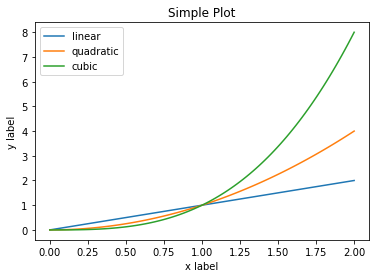

In [36]:
x = np.linspace(0, 2, 100)            # Create evenly spaced numbers start (0), end (2) over a specified interval (100).

fig, ax = plt.subplots()              # Create a figure and an axes.
ax.plot(x, x, label='linear')         # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')   # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')       # ... and some more.
ax.set_xlabel('x label')              # Add an x-label to the axes.
ax.set_ylabel('y label')              # Add a y-label to the axes.
ax.set_title("Simple Plot")           # Add a title to the axes.
ax.legend()                           # Add a legend.

### Add this example to our Chicks!

Text(0, 0.5, 'Chicken weight')

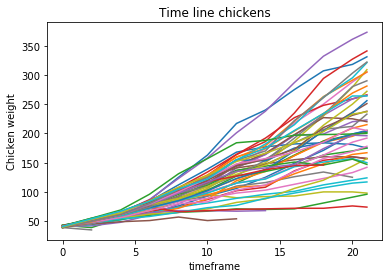

In [37]:
fig, ax = plt.subplots()                                                           # Create a fig. with one subplot (1 table)

for chick, chick_df in chickweight.groupby('chick'):                               # group data by chicks  
    chick_df.plot ('time','weight', label=f'chick {chick}', ax=ax, legend = 0)     # and loop through every chicken
                                                                                   #  x = time data per chick 
                                                                                   #  y = weight data per chick
                                                                                   #  label every line with chick1-50  
                                                                                   #  ax=ax, timesteps (x) same for every chick
                                                                                   #        even if a chick dies, filled NaN
                                                                                   #  legend = 0 (do not show legend)   
    
ax.set_title('Time line chickens')                                                 # Set title on the axis
ax.set_xlabel('timeframe')                                                         # Set x label 
ax.set_ylabel('Chicken weight')                                                    # Set y label 


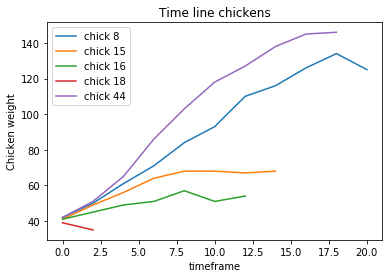

In [38]:
fig, ax = plt.subplots()

# Create a fuction that return the "dead" chickens (We did in Exercise 2)
def deadchicken (df):
        return(
        df
        .assign(maxAgeChicken=lambda df: df.groupby('chick')['time'].transform('max'))
        .loc[lambda df: df['maxAgeChicken'] < df['time'].max()]
            
        )

for chick, chick_df in deadchicken(chickweight).groupby('chick'):
    chick_df.plot ('time','weight', label=f'chick {chick}', ax=ax, legend = 1)
    
    ax.set_title('Time line chickens')                                                 
    ax.set_xlabel('timeframe')                                                       
    ax.set_ylabel('Chicken weight')                                                     

In [40]:
# References

We can do every example but most of the plots are custom made and not unique

Documentation:
https://matplotlib.org/contents.html

## examples
https://matplotlib.org/gallery.html  
    
    
    

SyntaxError: invalid syntax (<ipython-input-40-d832f5e51fde>, line 3)